# Cuisine Classification

In this project, cuisine types are classified based on the ingredients used.

## Data Gathering

In [126]:
# import modules and the data file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.read_json('./train.json')
df.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


- The data set consists of three columns (id, cuisine, ingredients)  
- Null values are not found  
- Since the ingredients column has lots of different types of words in each row, we need to proceed to clean this column first

## Data cleaning

The ingredients list will be cleaned up -> in lowercase, without punctuations, digits, parenthesis, brand names.

In [105]:
ing = []
for i in df['ingredients']:
    i = ' '.join(i)
    ing.append(i)

df['ing'] = ing

import re  #regular expression package
l=[]
for i in df['ing']:
    
    #Remove punctuations
    i=re.sub(r'[^\w\s]','',i)
    
    #Remove Digits
    i=re.sub(r"(\d)", "", i)
    
    #Remove content inside parenthesis
    i=re.sub(r'\([^)]*\)', '', i)
    
    #Remove Brand Name
    i=re.sub(u'\w*\u2122', '', i)
    
    #Convert to lowercase
    i=i.lower()
    
    l.append(i)
df['ing_mod']=l
print(df.head(10))

      id      cuisine                                        ingredients  \
0  10259        greek  [romaine lettuce, black olives, grape tomatoes...   
1  25693  southern_us  [plain flour, ground pepper, salt, tomatoes, g...   
2  20130     filipino  [eggs, pepper, salt, mayonaise, cooking oil, g...   
3  22213       indian                [water, vegetable oil, wheat, salt]   
4  13162       indian  [black pepper, shallots, cornflour, cayenne pe...   
5   6602     jamaican  [plain flour, sugar, butter, eggs, fresh ginge...   
6  42779      spanish  [olive oil, salt, medium shrimp, pepper, garli...   
7   3735      italian  [sugar, pistachio nuts, white almond bark, flo...   
8  16903      mexican  [olive oil, purple onion, fresh pineapple, por...   
9  12734      italian  [chopped tomatoes, fresh basil, garlic, extra-...   

                                                 ing  \
0  romaine lettuce black olives grape tomatoes ga...   
1  plain flour ground pepper salt tomatoes ground..

## Exploratory Data Analysis

For EDA, we first investigate the top ingredients in all cuisines followed by in each type of cuisine.

### Top 10 Ingredients in All Cuisines

In [106]:
from collections import Counter
top_10_ing_total = Counter(" ".join(df["ing_mod"]).split()).most_common(10)
top_10_ing_total

[('pepper', 25742),
 ('salt', 24426),
 ('oil', 23323),
 ('garlic', 18941),
 ('ground', 18256),
 ('fresh', 17853),
 ('sauce', 13129),
 ('sugar', 12493),
 ('onions', 12341),
 ('cheese', 11776)]

In [107]:
# function for listing top 10 ingredients
def top_10_ing(country):
    top_10_ing = Counter(" ".join(df[df['cuisine'] == country]["ing_mod"]).split()).most_common(10)
    print(top_10_ing)

### Top 10 Ingredients in Italian Cuisine

In [108]:
# italian cuisine
top_10_ing("italian")

[('cheese', 5883), ('pepper', 5524), ('oil', 5183), ('salt', 4880), ('fresh', 4589), ('olive', 4566), ('garlic', 4177), ('ground', 2981), ('tomatoes', 2473), ('black', 2473)]


### Top 10 Ingredients in Mexican Cuisine

In [109]:
# mexican cuisine
top_10_ing("mexican")

[('pepper', 4355), ('salt', 3913), ('ground', 3495), ('garlic', 3224), ('cheese', 2994), ('oil', 2978), ('cilantro', 2794), ('fresh', 2597), ('chicken', 2461), ('onions', 2370)]


### Top 10 Ingredients in Southern US Cuisine

In [110]:
# southern US
top_10_ing("southern_us")

[('salt', 3041), ('pepper', 2680), ('sugar', 2318), ('butter', 2144), ('flour', 1847), ('ground', 1532), ('eggs', 1386), ('powder', 1302), ('oil', 1276), ('baking', 1231)]


### Top 10 Ingredients in Indian Cuisine

In [111]:
# indian
top_10_ing("indian")

[('ground', 2792), ('salt', 2389), ('oil', 2031), ('garlic', 1637), ('fresh', 1636), ('cumin', 1563), ('powder', 1500), ('ginger', 1475), ('pepper', 1413), ('onions', 1294)]


In this way, we can identify the top 10 ingredients for each cuisine type and get some sense of what ingredients are uniquely used for each cuisine type.

### Pie charts for top 10 ingredients by cuisine type

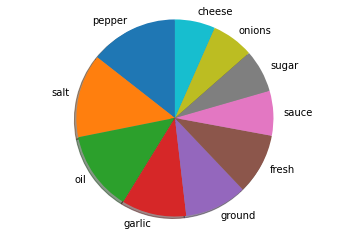

In [112]:
# all
labels = 'pepper', 'salt', 'oil', 'garlic', 'ground', 'fresh', 'sauce', 'sugar', 'onions', 'cheese'
sizes = [25742, 24426, 23323, 18941, 18256, 17853, 13129, 12493, 12341, 11776]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

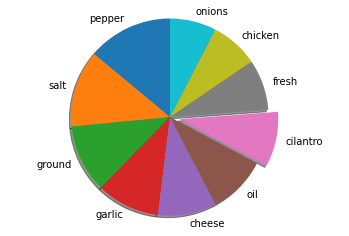

In [113]:
# for mexican
labels = 'pepper', 'salt', 'ground', 'garlic', 'cheese', 'oil', 'cilantro', 'fresh', 'chicken', 'onions'
sizes = [4355, 3913, 3495, 3224, 2994, 2978, 2794, 2597, 2461, 2370]
explode = (0, 0, 0, 0, 0, 0, 0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

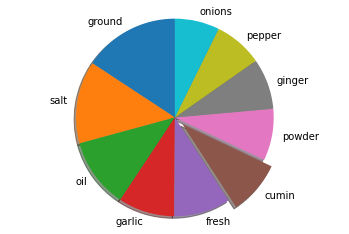

In [114]:
# for indian
labels = 'ground', 'salt', 'oil', 'garlic', 'fresh', 'cumin', 'powder', 'ginger', 'pepper', 'onions'
sizes = [2792, 2389, 2031, 1637, 1636, 1563, 1500, 1475, 1413, 1294]
explode = (0, 0, 0, 0, 0, 0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## Feature Engineering

Now we move to the feature engineering step. The weighted values of each ingredient for each row is calculated using TF-IDF method.

In [115]:
# TFIDF Vectorizer package - assigns weighted values of each ingredient in each cuisine
# Format is: (A,B) C
# A = cuisine (one particular recipe)
# B = ingredient 
# C = weighted value for that ingredient

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['ing_mod'])

print(X)

#print(vectorizer.get_feature_names()) 
# allows you to look up specific ingredients for each cuisine (recipe)
# a lower number corresponds to a more common ingredient
# higher numbers correspond to more uncommon ingredients
# for example, the first 10 ingredients for the first recipe in the list:
print(vectorizer.get_feature_names()[737])
print(vectorizer.get_feature_names()[514])
print(vectorizer.get_feature_names()[965])
print(vectorizer.get_feature_names()[169])
print(vectorizer.get_feature_names()[1096])
print(vectorizer.get_feature_names()[2438])
print(vectorizer.get_feature_names()[1900])
print(vectorizer.get_feature_names()[2213])
print(vectorizer.get_feature_names()[2029])
print(vectorizer.get_feature_names()[1102])

  (0, 737)	0.3342850337273161
  (0, 514)	0.14566825492643998
  (0, 965)	0.30400394602019953
  (0, 169)	0.2074660261516008
  (0, 1096)	0.3884899344761486
  (0, 2438)	0.2300545697461994
  (0, 1900)	0.16453186533503777
  (0, 2213)	0.2391068518841475
  (0, 2029)	0.1020732917707325
  (0, 1102)	0.10529956769097745
  (0, 2818)	0.15181908252212178
  (0, 1179)	0.3502745662929836
  (0, 1896)	0.26098157183361415
  (0, 231)	0.14063713569310485
  (0, 1547)	0.2663588843454822
  (0, 2330)	0.3426308034163987
  (1, 1886)	0.11549132147317556
  (1, 2924)	0.2107325798832065
  (1, 1730)	0.21005324207562454
  (1, 1687)	0.398269208090823
  (1, 673)	0.21832568961691898
  (1, 3033)	0.27462604691618225
  (1, 1201)	0.18766244702998996
  (1, 904)	0.19917356302194517
  (1, 2796)	0.26959523716481065
  :	:
  (39772, 673)	0.1059658842548699
  (39772, 2384)	0.052116715699356705
  (39772, 1021)	0.08818672837298537
  (39772, 1102)	0.061087556243514606
  (39773, 481)	0.2568242577720407
  (39773, 2328)	0.40063213857624447

Then, each cuisine is encoded to a number so that we can easily use the classification algorithms.

In [116]:
# encode the cuisines
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
label_encoder.fit(df['cuisine'])
df['cuisine']=label_encoder.transform(df['cuisine']) 

In [117]:
df['cuisine'].value_counts()

9     7838
13    6438
16    4320
7     3003
3     2673
5     2646
2     1546
18    1539
11    1423
6     1175
17     989
12     830
19     825
14     821
1      804
4      755
8      667
10     526
15     489
0      467
Name: cuisine, dtype: int64

In [118]:
# Maps a number (0-19) to each cuisine type
cuisine_map={'0':'brazilian', '1':'british', '2':'cajun_creole', '3':'chinese', '4':'filipino', '5':'french',
             '6':'greek', '7':'indian', '8':'irish', '9':'italian', '10':'jamaican', '11':'japanese',
             '12':'korean', '13':'mexican', '14':'moroccan', '15':'russian', '16':'southern_us', '17':'spanish',
             '18':'thai', '19':'vietnamese'}

In [119]:
# Outputs the mapped cuisine value for each of the 39774 cuisines (recipes)
Y=[]
Y = df['cuisine']

## Implement Machine Learning Algorithms

Finally, we try three machine learning algorithms (K-Nearest neighbor, support vector machine, random forest) for classification here.

In [120]:
# load the packages
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 

Training (80%) and test (20%) sets are split first.

In [121]:
# Train, test, split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

### Method 1: K-Nearest Neighbor

In [122]:
# Method 1
# KNN algorithm
for K in range(30):
 K_value = K+1
 neigh = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
 neigh.fit(X_train, y_train) 
 y_pred = neigh.predict(X_test)
 print("Accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:",K_value)

Accuracy is  69.22690131992456 % for K-Value: 1
Accuracy is  67.40414833438089 % for K-Value: 2
Accuracy is  71.06222501571338 % for K-Value: 3
Accuracy is  72.0678818353237 % for K-Value: 4
Accuracy is  72.74670018856065 % for K-Value: 5
Accuracy is  72.9855436832181 % for K-Value: 6
Accuracy is  73.41294783155247 % for K-Value: 7
Accuracy is  73.66436203645506 % for K-Value: 8
Accuracy is  74.00377121307355 % for K-Value: 9
Accuracy is  73.73978629792583 % for K-Value: 10
Accuracy is  74.01634192331866 % for K-Value: 11
Accuracy is  74.05405405405405 % for K-Value: 12
Accuracy is  74.12947831552484 % for K-Value: 13
Accuracy is  74.16719044626021 % for K-Value: 14
Accuracy is  74.26775612822124 % for K-Value: 15
Accuracy is  74.46888749214331 % for K-Value: 16
Accuracy is  74.53174104336895 % for K-Value: 17
Accuracy is  74.39346323067252 % for K-Value: 18
Accuracy is  74.4186046511628 % for K-Value: 19
Accuracy is  74.3306096794469 % for K-Value: 20
Accuracy is  74.20490257699561 % 

In [128]:
# Implement KNN 
# Take the K value to be 17, since that is when accuracy is maximized
neigh = KNeighborsClassifier(n_neighbors = 17, weights='uniform', algorithm='auto')
neigh.fit(X_train, y_train) 
y_pred = neigh.predict(X_test)
print("Best accuracy is ", accuracy_score(y_test,y_pred)*100,"% for K-Value:17")

Best accuracy is  74.53174104336895 % for K-Value:17


### Method 2: Support Vector Machine

Default hyperparameters of support vector machine are tested first.

In [39]:
from sklearn.svm import SVC
svc_def = SVC()
svc_def.fit(X_train, y_train)

# Print the overall accuracy
from sklearn.metrics import accuracy_score
y_pred_svm_def = svc_def.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm_def)))

Model accuracy score : 0.7975


To optimize the support vector machine classifier, hyperparameters are tuned by using GridSearchCV package.

In [10]:
# Hyperparameters tuning for SVM
from sklearn.model_selection import GridSearchCV
svc_params = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
svc = GridSearchCV(SVC(), param_grid=svc_params)
svc.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']})

In [11]:
# Print the overall accuracy
y_pred_svm = svc.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_svm)))

Model accuracy score : 0.8087


In [13]:
svc.best_estimator_

SVC(C=10, gamma=1)

By optimizing hyperparameters, 1.12% of accuarcy has been increased.

### Method 3: Random Forest

Default hyperparameters of random forest classification are tested first.

In [41]:
from sklearn.ensemble import RandomForestClassifier
rf_def = RandomForestClassifier(random_state=100)
rf_def.fit(X_train, y_train)

# Print the overall accuracy
y_pred_rf_def = rf_def.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf_def)))

Model accuracy score : 0.7470


For hyperparameters tuning for random forest classification, two steps are applied.  
First, RandomizedSearchCV will be used to narrow down the ranges of hyperparameters (random combinations of the candidates will be tried here),  
Then, GridSearchCV will be used for comprehensive consideration of every possible combination of the candidates

#### Randomized search

In [14]:
from sklearn.model_selection import RandomizedSearchCV

# define a broad range of each parameter for random forest classification
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)] # Number of trees in random forest
max_features = ['auto', 'sqrt'] # Number of features to consider at every split
max_depth = [int(x) for x in np.linspace(5, 50, num = 20)] # Maximum number of levels in tree
max_depth.append(None)
min_samples_split = [2, 5, 10] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4] # Minimum number of samples required at each leaf node
bootstrap = [True, False] # Method of selecting samples for training each tree

rf_params_rs = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# do random search
rf_rs = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=100), param_distributions = rf_params_rs, n_iter = 100, cv = 3, verbose=2, random_state=100, n_jobs = -1)
rf_rs.fit(X_train, y_train)

# print the best param from random search
rf_rs.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'bootstrap': False}

#### Grid search

In [21]:
# Create the parameter grid based on the results of random search 
# numbers near the best parameters obtained from random search will be tried... just don't have the results now
rf_params_gs = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'auto'],
    'max_depth': [None],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [False]}

rf_gs = GridSearchCV(estimator=RandomForestClassifier(random_state=100), param_grid=rf_params_gs, cv = 3, verbose=2, n_jobs = -1)
rf_gs.fit(X_train, y_train)

Fitting 3 folds for each of 90 candidates, totalling 270 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=100),
             n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [None],
                         'max_features': ['sqrt', 'auto'],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             verbose=2)

In [22]:
# Print the overall accuracy
y_pred_rf = rf_gs.predict(X_test)
print('Model accuracy score : {0:0.4f}'. format(accuracy_score(y_test, y_pred_rf)))

Model accuracy score : 0.7614


In [24]:
rf_gs.best_estimator_

RandomForestClassifier(bootstrap=False, max_features='sqrt',
                       min_samples_split=3, n_estimators=300, random_state=100)

By optimizing hyperparameters, 1.44% of accuarcy has been increased.

In conclusion, SVM model shows the best performance in accuracy.